In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 경로 설정
import os
os.chdir('/content/drive/Shareddrives/UROP')   #파일이 있는 폴더의 경로를 가져오기
os.getcwd()

'/content/drive/Shareddrives/UROP'

In [4]:
df = pd.read_csv('df_20.csv')
df

,review,score,name,region,len
0,my colleague and i were blown away at the aest...,10.0,Roynet Hotel Seoul Mapo,seoul,367
1,lovely hotel in a busy neighborhood big super ...,9.6,Roynet Hotel Seoul Mapo,seoul,302
2,its okay with the price near subway station bu...,8.0,Roynet Hotel Seoul Mapo,seoul,92
3,love the japanese style toilet seat and bath t...,10.0,Roynet Hotel Seoul Mapo,seoul,396
4,the hotel is in the middle of mapo station exi...,6.8,Roynet Hotel Seoul Mapo,seoul,203
...,...,...,...,...,...
2475,there is no swimming pool as advertisement the...,6.4,Ramada Jeju Cityhall,jeju,109
2476,everything was good except the reception is no...,6.8,Ramada Jeju Cityhall,jeju,189
2477,a hotel just for one night stay don't expect m...,4.8,Ramada Jeju Cityhall,jeju,157
2478,the queen size bed is small than standard size...,4.8,Ramada Jeju Cityhall,jeju,356


In [5]:
df['label'] = df['score'].apply(lambda x: 1 if x >= 7.0 else 0)  #긍정:1, 부정:0
df

,review,score,name,region,len,label
0,my colleague and i were blown away at the aest...,10.0,Roynet Hotel Seoul Mapo,seoul,367,1
1,lovely hotel in a busy neighborhood big super ...,9.6,Roynet Hotel Seoul Mapo,seoul,302,1
2,its okay with the price near subway station bu...,8.0,Roynet Hotel Seoul Mapo,seoul,92,1
3,love the japanese style toilet seat and bath t...,10.0,Roynet Hotel Seoul Mapo,seoul,396,1
4,the hotel is in the middle of mapo station exi...,6.8,Roynet Hotel Seoul Mapo,seoul,203,0
...,...,...,...,...,...,...
2475,there is no swimming pool as advertisement the...,6.4,Ramada Jeju Cityhall,jeju,109,0
2476,everything was good except the reception is no...,6.8,Ramada Jeju Cityhall,jeju,189,0
2477,a hotel just for one night stay don't expect m...,4.8,Ramada Jeju Cityhall,jeju,157,0
2478,the queen size bed is small than standard size...,4.8,Ramada Jeju Cityhall,jeju,356,0


# 데이터 분석 및 전처리

Text(0, 0.5, 'Number of review')

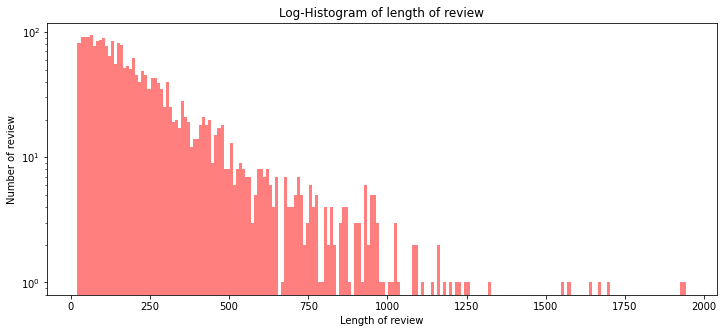

In [6]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request

plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(df['len'], bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review')

In [7]:
train_length = df['len']
print('리뷰 길이 최대 값: {}'.format(np.max(train_length)))
print('리뷰 길이 최소 값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최대 값: 1944
리뷰 길이 최소 값: 21
리뷰 길이 평균 값: 236.57
리뷰 길이 표준편차: 221.56
리뷰 길이 중간 값: 167.0
리뷰 길이 제 1 사분위: 89.0
리뷰 길이 제 3 사분위: 302.25


{'whiskers': [<matplotlib.lines.Line2D at 0x7feda6b66700>,
 'caps': [<matplotlib.lines.Line2D at 0x7feda6b66dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feda6b663a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7feda6b724c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7feda6b72b20>],
 'means': [<matplotlib.lines.Line2D at 0x7feda6b727c0>]}

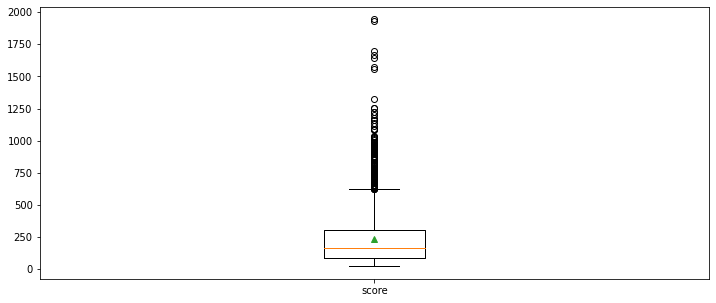

In [8]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(train_length,
             labels=['score'],
             showmeans=True)

## 워드클라우드

(-0.5, 799.5, 599.5, -0.5)

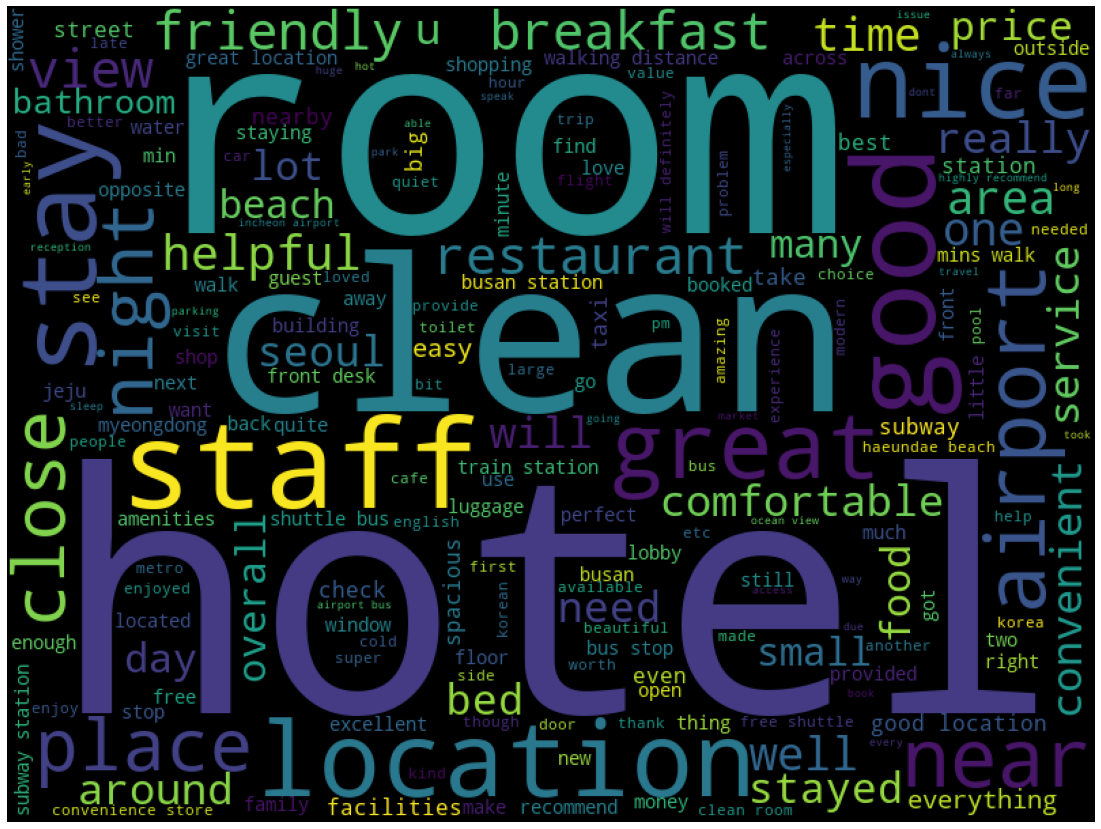

In [9]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(df['review']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

# [1분류] 지도학습 기반 감성분석 (0,1)
*  y = 'label' (0,1)

In [10]:
from sklearn.model_selection import train_test_split

class_df = df['label']
feature_df = df.drop(['score','name',	'region',	'len',	'label'], axis = 1, inplace = False)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size=0.2, random_state=2023)

X_train.shape, X_test.shape, 

((1984, 1), (496, 1))

In [12]:
y_train.shape, y_test.shape,

((1984,), (496,))

## [1-1] Logistic Classfication

### 단어 출현 빈도를 벡터화하여 예측 성능 측정 (CountVectorizer)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve

pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1,2))),   # 단어 출현 빈도를 벡터화하여 표현하는 함수
    ('lr_clf', LogisticRegression(C=10))])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]


print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test, pred),
                                                 roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.9093, ROC-AUC는 0.7933


In [30]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, pred_probs)

0.9762395956335991

### tf-idf벡터화 적용해서 예측 성능 측정
->> 성능 상승

In [31]:
pipeline = Pipeline([
    ('cnt_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2))),
    ('lr_clf', LogisticRegression(C=10))])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]


print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test, pred),
                                                 roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.9153, ROC-AUC는 0.8006


In [32]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, pred_probs)

0.9745343250461775

- pr_auc은 약간 줄어듬


## [1-2] Random Forest

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
tfidf_vect.fit(X_train['review'])
tfidf_matrix_train = tfidf_vect.transform(X_train['review'])

tfidf_matrix_train.shape

(1984, 32987)

In [35]:
# RandomForestClassifier 을 이용하여 감성 분석 Classification 수행. 
lg_clf = RandomForestClassifier(random_state=0)

# Parameter C 최적화를 위해 GridSearchCV 를 이용. 
params= { 
    'n_estimators': [200, 500],
    'max_depth' : [4,5,6,7,8],
}

grid_cv = GridSearchCV(lg_clf , param_grid=params , cv=2 ,scoring='accuracy', verbose=2)
grid_cv.fit(tfidf_matrix_train , y_train)
print(grid_cv.best_params_ , round(grid_cv.best_score_,4))

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END ......................max_depth=4, n_estimators=200; total time=   0.4s
[CV] END ......................max_depth=4, n_estimators=200; total time=   0.4s
[CV] END ......................max_depth=4, n_estimators=500; total time=   0.9s
[CV] END ......................max_depth=4, n_estimators=500; total time=   0.9s
[CV] END ......................max_depth=5, n_estimators=200; total time=   0.4s
[CV] END ......................max_depth=5, n_estimators=200; total time=   0.4s
[CV] END ......................max_depth=5, n_estimators=500; total time=   1.0s
[CV] END ......................max_depth=5, n_estimators=500; total time=   1.0s
[CV] END ......................max_depth=6, n_estimators=200; total time=   0.7s
[CV] END ......................max_depth=6, n_estimators=200; total time=   1.4s
[CV] END ......................max_depth=6, n_estimators=500; total time=   4.5s
[CV] END ......................max_depth=6, n_es

In [36]:
grid_cv.best_params_

{'max_depth': 4, 'n_estimators': 200}

In [37]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용하여 테스트 데이터를 TF-IDF 값으로 Feature 변환함. 
tfidf_matrix_test = tfidf_vect.transform(X_test['review'])

# classifier 는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)
pred_probs = best_estimator.predict_proba(tfidf_matrix_test)[:,1]

print(best_estimator)
print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test, preds),
                                                 roc_auc_score(y_test, pred_probs)))

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=0)
예측 정확도는 0.9153, ROC-AUC는 0.6737


In [38]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, pred_probs)

0.952416566431244

In [39]:
best_estimator.predict(tfidf_matrix_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

알고보니 죄다 1로 예측해서 둘다 0.9153으로 정확도가 똑같은...

In [40]:
best_estimator.predict_proba(tfidf_matrix_test)[:5]

array([[0.11450434, 0.88549566],
       [0.11102388, 0.88897612],
       [0.12040212, 0.87959788],
       [0.12075386, 0.87924614],
       [0.12775904, 0.87224096]])

## [1-3] deep-learning 
*  word2vec 또는 glove의 단어 벡터를 사용하여 단어의 시퀀스에서 벡터의 시퀀스로 문장을 변환한 다음 LSTM으로 전달해야 한다.

In [45]:
from tensorflow.keras.datasets import reuters
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SimpleRNN, GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [46]:
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### 토큰화

In [47]:
data = df

In [48]:
tokens = [str(data['review'].iloc[i]).split() for i in range(len(data['review']))]
tokens[:3]

[['my',
  'colleague',
  'and',
  'i',
  'were',
  'blown',
  'away',
  'at',
  'the',
  'aesthetic',
  'ambience',
  'and',
  'overall',
  'beauty',
  'of',
  'this',
  'hotel',
  'the',
  'bathrooms',
  'are',
  'japanese',
  'style',
  'including',
  'deep',
  'tub',
  'and',
  'shower',
  'room',
  'it',
  'is',
  'conveniently',
  'located',
  'in',
  'mapo',
  'close',
  'to',
  'everything',
  'the',
  'reason',
  'for',
  'our',
  'stay',
  'was',
  'to',
  'hop',
  'on',
  'the',
  'vipp',
  'dmz',
  'tour',
  'at',
  'gongbeok',
  'station',
  'it',
  'was',
  'less',
  'than',
  'a',
  'min',
  'walk',
  'from',
  'the',
  'hotel',
  'i',
  'hope',
  'to',
  'stay',
  'here',
  'again',
  'soon'],
 ['lovely',
  'hotel',
  'in',
  'a',
  'busy',
  'neighborhood',
  'big',
  'super',
  'markets',
  'subway',
  'station',
  'with',
  'intersecting',
  'lines',
  'including',
  'airport',
  'line',
  'and',
  'diverse',
  'selection',
  'of',
  'restaurants',
  'in',
  'walking'

In [49]:
# 어간추출 / 불용어 제거?
'''
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
stopwords_en = stopwords.words('english')


# 추출된 트윗 전처리
def preprocess(text):
  text = ' '.join(re.findall(r'[a-zA-Z_-]+', text))
  text = text.lower()  # 정규화(대소문자 통합)
  tokens = nltk.word_tokenize(text)  # 토큰화
  lemmatizer = nltk.stem.WordNetLemmatizer()
  irrelevant = [] 
  tokens = [lemmatizer.lemmatize(t) for t in tokens]  # 표제어 추출
  tokens = [t for t in tokens if t not in stopwords_en + irrelevant]  # 불용어 제거
  tokens = [t for t in tokens if re.fullmatch(r'[a-z_-]{2,}',t)]  # 기타 처리
  return ' '.join(tokens)

documents_preprocessed = [preprocess(text) for text in documents]    # 전처리된 문서
documents_preprocessed[0:2]'''

"\nfrom sklearn.feature_extraction.text import CountVectorizer\nfrom sklearn.decomposition import LatentDirichletAllocation\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport nltk\nnltk.download('punkt')\nnltk.download('wordnet')\nnltk.download('stopwords')\nfrom nltk.corpus import stopwords\nimport re\nstopwords_en = stopwords.words('english')\n\n\n# 추출된 트윗 전처리\ndef preprocess(text):\n  text = ' '.join(re.findall(r'[a-zA-Z_-]+', text))\n  text = text.lower()  # 정규화(대소문자 통합)\n  tokens = nltk.word_tokenize(text)  # 토큰화\n  lemmatizer = nltk.stem.WordNetLemmatizer()\n  irrelevant = [] \n  tokens = [lemmatizer.lemmatize(t) for t in tokens]  # 표제어 추출\n  tokens = [t for t in tokens if t not in stopwords_en + irrelevant]  # 불용어 제거\n  tokens = [t for t in tokens if re.fullmatch(r'[a-z_-]{2,}',t)]  # 기타 처리\n  return ' '.join(tokens)\n\ndocuments_preprocessed = [preprocess(text) for text in documents]    # 전처리된 문서\ndocuments_preprocessed[0:2]"

### 정수 인코딩

In [50]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokens)

In [51]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'to': 3, 'is': 4, 'a': 5, 'hotel': 6, 'was': 7, 'in': 8, 'room': 9, 'for': 10, 'i': 11, 'of': 12, 'very': 13, 'it': 14, 'good': 15, 'with': 16, 'location': 17, 'but': 18, 'we': 19, 'clean': 20, 'staff': 21, 'this': 22, 'you': 23, 'not': 24, 'at': 25, 'are': 26, 'from': 27, 'stay': 28, 'there': 29, 'great': 30, 'station': 31, 'airport': 32, 'nice': 33, 'that': 34, 'as': 35, 'were': 36, 'so': 37, 'my': 38, 'on': 39, 'just': 40, 'have': 41, 'if': 42, 'they': 43, 'bus': 44, 'near': 45, 'be': 46, 'view': 47, 'our': 48, 'only': 49, 'also': 50, 'had': 51, 'all': 52, 'walk': 53, 'will': 54, 'no': 55, 'can': 56, 'friendly': 57, 'next': 58, 'subway': 59, 'which': 60, 'breakfast': 61, 'would': 62, 'rooms': 63, 'convenient': 64, 'well': 65, 'helpful': 66, 'busan': 67, 'time': 68, 'by': 69, 'comfortable': 70, 'night': 71, 'here': 72, 'again': 73, 'service': 74, 'close': 75, 'restaurants': 76, 'when': 77, 'one': 78, 'around': 79, 'food': 80, 'too': 81, 'right': 82, 'area': 83, '

In [52]:
print(tokenizer.word_counts)

OrderedDict([('my', 467), ('colleague', 1), ('and', 4011), ('i', 1326), ('were', 475), ('blown', 2), ('away', 157), ('at', 684), ('the', 6416), ('aesthetic', 1), ('ambience', 1), ('overall', 159), ('beauty', 1), ('of', 1287), ('this', 711), ('hotel', 2164), ('bathrooms', 12), ('are', 663), ('japanese', 13), ('style', 19), ('including', 23), ('deep', 5), ('tub', 42), ('shower', 88), ('room', 1414), ('it', 1054), ('is', 2618), ('conveniently', 39), ('located', 203), ('in', 1442), ('mapo', 42), ('close', 230), ('to', 3379), ('everything', 135), ('reason', 14), ('for', 1364), ('our', 331), ('stay', 648), ('was', 1785), ('hop', 11), ('on', 462), ('vipp', 1), ('dmz', 1), ('tour', 22), ('gongbeok', 1), ('station', 554), ('less', 40), ('than', 137), ('a', 2266), ('min', 85), ('walk', 301), ('from', 659), ('hope', 12), ('here', 239), ('again', 236), ('soon', 11), ('lovely', 22), ('busy', 15), ('neighborhood', 12), ('big', 168), ('super', 96), ('markets', 8), ('subway', 266), ('with', 836), ('in

In [53]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 6073
등장 빈도가 2번 이하인 희귀 단어의 수: 3798
단어 집합에서 희귀 단어의 비율: 62.53910752511115
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.279716658343967


In [54]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1    # 6073 - 3798 + 1
print('단어 집합의 크기 :',vocab_size)   # 2276

단어 집합의 크기 : 2276


In [55]:
tokenizer = Tokenizer(vocab_size)  
tokenizer.fit_on_texts(tokens)
encoded = tokenizer.texts_to_sequences(tokens)

In [56]:
print(tokens[0])
print(encoded[0])

['my', 'colleague', 'and', 'i', 'were', 'blown', 'away', 'at', 'the', 'aesthetic', 'ambience', 'and', 'overall', 'beauty', 'of', 'this', 'hotel', 'the', 'bathrooms', 'are', 'japanese', 'style', 'including', 'deep', 'tub', 'and', 'shower', 'room', 'it', 'is', 'conveniently', 'located', 'in', 'mapo', 'close', 'to', 'everything', 'the', 'reason', 'for', 'our', 'stay', 'was', 'to', 'hop', 'on', 'the', 'vipp', 'dmz', 'tour', 'at', 'gongbeok', 'station', 'it', 'was', 'less', 'than', 'a', 'min', 'walk', 'from', 'the', 'hotel', 'i', 'hope', 'to', 'stay', 'here', 'again', 'soon']
[38, 2, 11, 36, 120, 25, 1, 2, 118, 12, 22, 6, 1, 840, 26, 792, 621, 547, 1448, 334, 2, 189, 9, 14, 4, 357, 87, 8, 335, 75, 3, 138, 1, 748, 10, 48, 28, 7, 3, 886, 39, 1, 566, 25, 31, 14, 7, 349, 135, 5, 196, 53, 27, 1, 6, 11, 841, 3, 28, 72, 73, 887]


### 패딩

최대 길이 : 317
평균 길이 : 41.73790322580645


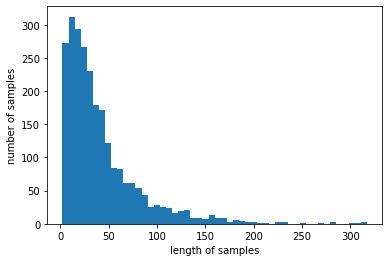

In [57]:
max_len = max(len(item) for item in encoded)
print('최대 길이 :',max_len)

avg_len = sum(map(len, encoded))/len(encoded)
print('평균 길이 :',avg_len)

plt.hist([len(item) for item in encoded], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [58]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [59]:
max_len = 100
below_threshold_len(max_len, encoded)

전체 샘플 중 길이가 100 이하인 샘플의 비율: 91.73387096774194


In [60]:
# 모든 샘플의 길이를 100으로 맞추기

padded = pad_sequences(encoded, padding='post', maxlen=100)
padded

array([[  38,    2,   11, ...,    0,    0,    0],
       [ 567,    6,    8, ...,    0,    0,    0],
       [  84,  622,   16, ...,    0,    0,    0],
       ...,
       [   5,    6,   40, ...,    0,    0,    0],
       [   1, 1116,  233, ...,    0,    0,    0],
       [ 313,    1,   17, ...,    0,    0,    0]], dtype=int32)

In [61]:
X = padded
y = np.array(data['label'])

print(X.shape)
print(y.shape)

(2480, 100)
(2480,)


In [62]:
print(X[0])
print(y[0])

[  38    2   11   36  120   25    1    2  118   12   22    6    1  840
   26  792  621  547 1448  334    2  189    9   14    4  357   87    8
  335   75    3  138    1  748   10   48   28    7    3  886   39    1
  566   25   31   14    7  349  135    5  196   53   27    1    6   11
  841    3   28   72   73  887    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
1


In [63]:
y

array([1, 1, 1, ..., 0, 0, 1])

#### train_test_split & EDA

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=2023)

print("훈련데이터 X와 y의 차원:", X_train.shape, y_train.shape)
print("시험데이터 X와 y의 차원:", X_test.shape, y_test.shape)

훈련데이터 X와 y의 차원: (1984, 100) (1984,)
시험데이터 X와 y의 차원: (496, 100) (496,)


In [65]:
## 데이터 들여다보기
print('Number of train samples: %d'%len(X_train))
print('Number of test samples: %d'%len(X_test))
print('An example of the reuters data set')
print('...Input sample')
print(X_train[0])
print(len(X_train[0]))
print('...Output samples (2)')
print(y_train[0:10])
print('Number of categories: %d'%(y_test.max()+1))

Number of train samples: 1984
Number of test samples: 496
An example of the reuters data set
...Input sample
[  22    4   38  344   68  171   25   22    6   38  198  232    4   30
   18   22   68    4   24   35   15  152  402    4  660  135   38  198
  215   65  558    1   12    1    9    4  353   18    1  642    8   48
    9    4   24   82   14  156   46  108  255  226   18  271  226    1
   58  124    1 1717  756   10    1  226  656  595   24  756    1  542
   25   52   17 1343    4  146   15  102  196   53    3  143   99  107
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
100
...Output samples (2)
[1 1 1 1 1 1 1 1 1 1]
Number of categories: 2


In [66]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.vstack((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[   0    1]
 [ 240 1744]]


In [67]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.vstack((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[  0   1]
 [ 42 454]]


In [68]:
### Vocabulary set을 이용하여 정수 입력값을 단어로 치환하기
word_to_index = tokenizer.word_index
index_to_word = {}

## switching key and value in dictionary
for key, value in word_to_index.items():
    index_to_word[value] = key

## 빈도수 index번째 단어 살펴보기
index=5
print('빈도수 상위 '+ str(index) + '번째 단어 : {}'.format(index_to_word[index]))

## 복원된 문장 만들어보기
print(X_train[0])
print(print(' '.join([index_to_word[s] for s in X_train[0] if s!=0])))

빈도수 상위 5번째 단어 : a
[  22    4   38  344   68  171   25   22    6   38  198  232    4   30
   18   22   68    4   24   35   15  152  402    4  660  135   38  198
  215   65  558    1   12    1    9    4  353   18    1  642    8   48
    9    4   24   82   14  156   46  108  255  226   18  271  226    1
   58  124    1 1717  756   10    1  226  656  595   24  756    1  542
   25   52   17 1343    4  146   15  102  196   53    3  143   99  107
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
this is my second time staying at this hotel my first experience is great but this time is not as good their balcony is smaller than my first visit well maybe the of the room is different but the heater in our room is not right it could be out hot air but cold air the next day the remote control for the air con does not control the temperature at all location wise is quite good about min walk to myeongdong shopping street
None


In [69]:
print(X_test[0])
print(print(' '.join([index_to_word[s] for s in X_test[0] if s!=0])))

[   6 2271  687 1442 1439 1868  153 1283 1284 1400 1847 2271  427 1606
 1284 1605 1606    6 1608 1283 2225 1283 1400 1847 1283 2272 1440 1441
 1868 1844 1439 1844    6 1606  176 1608  703    8 1607  847 2223 1440
  847 2221 1605  847 1846 1400 2225 1440 1868  289 2222 2223 1284 1863
 1119 2272 1283 1439 1442 2220 2272 1440 1868 1605    8 1847 1605 1284
 1441   37 1606  359    8 2271  687    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
hotel von seogwipo haben wir auf jeju und es war dem von agoda ein es ist ein hotel mit und fr und war dem und sehr die nicht auf das wir das hotel ein pool mit bar in der im auch die im zimmer ist im frhstck war fr die auf minute den auch es o personal sehr und wir haben uns sehr die auf ist in dem ist es nicht so ein cafe in von seogwipo
None


#### LSTM의 입력값/출력값 형태에 맞도록 입력값 데이터 변환하기

In [70]:
print(X_train[0])
print(X_test[0])

## one hot coding
oh_y_train = to_categorical(y_train) # train set
#oh_y_valid = to_categorical(y_valid) # valid set 
oh_y_test = to_categorical(y_test)   # test set

print(y_train[0])
print(oh_y_train[0])

[  22    4   38  344   68  171   25   22    6   38  198  232    4   30
   18   22   68    4   24   35   15  152  402    4  660  135   38  198
  215   65  558    1   12    1    9    4  353   18    1  642    8   48
    9    4   24   82   14  156   46  108  255  226   18  271  226    1
   58  124    1 1717  756   10    1  226  656  595   24  756    1  542
   25   52   17 1343    4  146   15  102  196   53    3  143   99  107
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
[   6 2271  687 1442 1439 1868  153 1283 1284 1400 1847 2271  427 1606
 1284 1605 1606    6 1608 1283 2225 1283 1400 1847 1283 2272 1440 1441
 1868 1844 1439 1844    6 1606  176 1608  703    8 1607  847 2223 1440
  847 2221 1605  847 1846 1400 2225 1440 1868  289 2222 2223 1284 1863
 1119 2272 1283 1439 1442 2220 2272 1440 1868 1605    8 1847 1605 1284
 1441   37 1606  359    8 2271  687    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0

##[1-4] RNN  /  LSTM  /  GRU  (1-layered)
- 1-layered RNN와 1-layered LSTM 1-layered GRU 모델 구축하기

In [71]:
## 1-layered rnn
rnn = Sequential()
rnn.add(Embedding(vocab_size, 100))  #vocab_size=2276
#rnn.add(SimpleRNN(100, return_sequences = True, activation='tanh'))   # return_sequences parameter has to be set True to stack
rnn.add(SimpleRNN(100, return_sequences = False, activation='tanh'))
rnn.add(Dense(2, activation = 'sigmoid')) #binary-sigmoid/categorical-softmax

## 1-layered lstm
lstm = Sequential()
lstm.add(Embedding(vocab_size, 100))
#lstm.add(LSTM(100, return_sequences=True, activation='tanh'))
lstm.add(LSTM(100, activation='tanh'))
lstm.add(Dense(2, activation = 'sigmoid'))

## 1-layered gru
gru = Sequential()
gru.add(Embedding(vocab_size, 100))
#gru.add(GRU(100, return_sequences=True, activation='tanh'))
gru.add(GRU(100, activation='tanh'))
gru.add(Dense(2, activation = 'sigmoid'))

## model compile
rnn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
lstm.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
gru.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## start training
rnn_history = rnn.fit(X_train, oh_y_train, batch_size = 100, epochs = 60, validation_split=0.2)
lstm_history = lstm.fit(X_train, oh_y_train, batch_size = 100, epochs = 60, validation_split=0.2)
gru_history = gru.fit(X_train, oh_y_train, batch_size = 100, epochs = 60, validation_split=0.2)

Epoch 1/60
16/16 [==============================] - 5s 108ms/step - loss: 0.4999 - accuracy: 0.8116 - val_loss: 0.3799 - val_accuracy: 0.8766
Epoch 2/60
16/16 [==============================] - 2s 143ms/step - loss: 0.3745 - accuracy: 0.8796 - val_loss: 0.3748 - val_accuracy: 0.8766
Epoch 3/60
16/16 [==============================] - 1s 93ms/step - loss: 0.3678 - accuracy: 0.8796 - val_loss: 0.3728 - val_accuracy: 0.8766
Epoch 4/60
16/16 [==============================] - 2s 107ms/step - loss: 0.3644 - accuracy: 0.8796 - val_loss: 0.3720 - val_accuracy: 0.8766
Epoch 5/60
16/16 [==============================] - 4s 233ms/step - loss: 0.3630 - accuracy: 0.8778 - val_loss: 0.3734 - val_accuracy: 0.8766
Epoch 6/60
16/16 [==============================] - 5s 329ms/step - loss: 0.3550 - accuracy: 0.8796 - val_loss: 0.3925 - val_accuracy: 0.8766
Epoch 7/60
16/16 [==============================] - 3s 156ms/step - loss: 0.3436 - accuracy: 0.8866 - val_loss: 0.3825 - val_accuracy: 0.8791
Epoch 8

### 분류 정확도 확인하기
- 학습 데이터, 평가 데이터, 시험 데이터에서

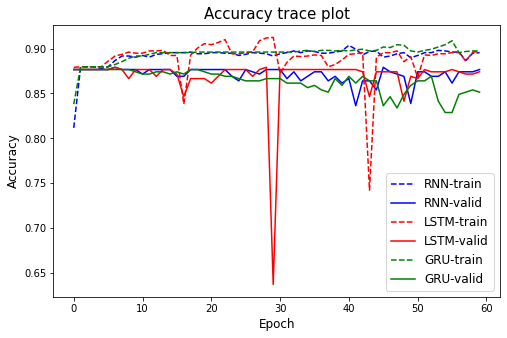

16/16 [==============================] - 0s 5ms/step - loss: 0.3897 - accuracy: 0.8992
Test data results
...RNN accuracy: 0.911, loss: 0.298
...LSTM accuracy: 0.907, loss: 0.307
...GRU accuracy: 0.899, loss: 0.390


In [72]:
plt.figure(figsize=(8,5))
plt.plot(rnn_history.history['accuracy'], 'b--', label='RNN-train')
plt.plot(rnn_history.history['val_accuracy'], 'b-', label='RNN-valid')
plt.plot(lstm_history.history['accuracy'], 'r--', label='LSTM-train')
plt.plot(lstm_history.history['val_accuracy'], 'r-', label='LSTM-valid')
plt.plot(gru_history.history['accuracy'], 'g--', label='GRU-train')
plt.plot(gru_history.history['val_accuracy'], 'g-', label='GRU-valid')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.title('Accuracy trace plot', fontsize=15)
plt.show()

rnn_results = rnn.evaluate(X_test, oh_y_test)
lstm_results = lstm.evaluate(X_test, oh_y_test)
gru_results = gru.evaluate(X_test, oh_y_test)
print('Test data results')
print('...RNN accuracy: %.3f, loss: %.3f'%(rnn_results[1], rnn_results[0]))
print('...LSTM accuracy: %.3f, loss: %.3f'%(lstm_results[1], lstm_results[0]))
print('...GRU accuracy: %.3f, loss: %.3f'%(gru_results[1], gru_results[0]))

### 모델 예측

In [73]:
y_pred_enc_rnn = rnn.predict(X_test)
y_pred_rnn = [np.argmax(i) for i in y_pred_enc_rnn]

y_pred_enc_lstm = lstm.predict(X_test)
y_pred_lstm = [np.argmax(i) for i in y_pred_enc_lstm]

y_pred_enc_gru = gru.predict(X_test)
y_pred_gru = [np.argmax(i) for i in y_pred_enc_gru]

16/16 [==============================] - 0s 4ms/step


In [76]:
unique_elements, counts_elements = np.unique(y_pred_rnn, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.vstack((unique_elements, counts_elements)))

unique_elements, counts_elements = np.unique(y_pred_lstm, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.vstack((unique_elements, counts_elements)))

unique_elements, counts_elements = np.unique(y_pred_gru, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.vstack((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[  0   1]
 [  6 490]]
각 레이블에 대한 빈도수:
[[  0   1]
 [  6 490]]
각 레이블에 대한 빈도수:
[[  0   1]
 [ 14 482]]


In [80]:
print('...RNN pr_auc: %.3f'%average_precision_score(y_test, y_pred_enc_rnn[:,1]))
print('...lstm pr_auc: %.3f'%average_precision_score(y_test, y_pred_enc_lstm[:,1]))
print('...gru pr_auc: %.3f'%average_precision_score(y_test, y_pred_enc_gru[:,1]))


...RNN pr_auc: 0.907
...lstm pr_auc: 0.923
...gru pr_auc: 0.920


In [82]:
def sentiment_predict(y_pred_enc ,new_sentence_index):
    print(X_test[new_sentence_index])
    print(' '.join([index_to_word[s] for s in X_test[new_sentence_index] if s!=0]))
    print(y_test[new_sentence_index])

    score = y_pred_enc

    if(np.argmax(score[new_sentence_index]) == 1):
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score[new_sentence_index][np.argmax(score[new_sentence_index])] * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.".format((score[new_sentence_index][np.argmax(score[new_sentence_index])]) * 100))

In [83]:
sentiment_predict(y_pred_enc_rnn, 4)
print('\n')
sentiment_predict(y_pred_enc_lstm, 4)
print('\n')
sentiment_predict(y_pred_enc_gru, 4)

[  55  724   90 1568   23   41    3  197    5  724    9   16  724   10
  746    6   55    3  238   16  136   55  240  342    3  197  176   23
   41    3   86    5    2  740    5 1407 1619    3  740    5  240   25
  193    4  102    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
no iron or board you have to use a iron room with iron for entire hotel no to help with taxi no coffee shop to use pool you have to get a and buy a swim cap to buy a coffee at restaurant is about
0
88.72% 확률로 긍정 리뷰입니다.


[  55  724   90 1568   23   41    3  197    5  724    9   16  724   10
  746    6   55    3  238   16  136   55  240  342    3  197  176   23
   41    3   86    5    2  740    5 1407 1619    3  740    5  240   25
  193    4  102    0    0    0    0    0    0    0    0  

In [84]:
sentiment_predict(y_pred_enc_rnn, 5)
print('\n')
sentiment_predict(y_pred_enc_lstm, 5)
print('\n')
sentiment_predict(y_pred_enc_gru, 5)

[   1   17    7   30   37 1250  282   29   25   71  191  246  275   71
  188    5  165  240  342   35   65   35   80  632    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
the location was great so happening down there at night got people make night market a lot coffee shop as well as food everywhere
1
88.78% 확률로 긍정 리뷰입니다.


[   1   17    7   30   37 1250  282   29   25   71  191  246  275   71
  188    5  165  240  342   35   65   35   80  632    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

In [85]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred_rnn)
df = pd.DataFrame(matrix)
print(df, '\n')

matrix2 = confusion_matrix(y_test, y_pred_lstm)
df2 = pd.DataFrame(matrix2)
print(df2, '\n')

matrix3 = confusion_matrix(y_test, y_pred_gru)
df3 = pd.DataFrame(matrix3)
print(df3)

   0    1
0  2   40
1  4  450 

   0    1
0  1   41
1  5  449 

    0    1
0   3   39
1  11  443


In [86]:
from sklearn.metrics import confusion_matrix, classification_report

In [87]:
print(classification_report(y_test, y_pred_rnn))

              precision    recall  f1-score   support

           0       0.33      0.05      0.08        42
           1       0.92      0.99      0.95       454

    accuracy                           0.91       496
   macro avg       0.63      0.52      0.52       496
weighted avg       0.87      0.91      0.88       496



In [88]:
print(classification_report(y_test, y_pred_lstm))

              precision    recall  f1-score   support

           0       0.17      0.02      0.04        42
           1       0.92      0.99      0.95       454

    accuracy                           0.91       496
   macro avg       0.54      0.51      0.50       496
weighted avg       0.85      0.91      0.87       496



In [89]:
print(classification_report(y_test, y_pred_gru))

              precision    recall  f1-score   support

           0       0.21      0.07      0.11        42
           1       0.92      0.98      0.95       454

    accuracy                           0.90       496
   macro avg       0.57      0.52      0.53       496
weighted avg       0.86      0.90      0.88       496



##[1-5] RNN  /  LSTM  /  GRU  (2-layered)
- 2-layered RNN와 2-layered LSTM 2-layered GRU 모델 구축하기

In [90]:
## 2-layered rnn
rnn = Sequential()
rnn.add(Embedding(vocab_size, 100))  #6073->2276
rnn.add(SimpleRNN(100, return_sequences = True, activation='tanh'))   # return_sequences parameter has to be set True to stack
rnn.add(SimpleRNN(100, return_sequences = False, activation='tanh'))
rnn.add(Dense(2, activation = 'sigmoid')) #binary-sigmoid/categorical-softmax

## 2-layered lstm
lstm = Sequential()
lstm.add(Embedding(vocab_size, 100))
lstm.add(LSTM(100, return_sequences=True, activation='tanh'))
lstm.add(LSTM(100, activation='tanh'))
lstm.add(Dense(2, activation = 'sigmoid'))

## 2-layered gru
gru = Sequential()
gru.add(Embedding(vocab_size, 100))
gru.add(GRU(100, return_sequences=True, activation='tanh'))
gru.add(GRU(100, activation='tanh'))
gru.add(Dense(2, activation = 'sigmoid'))

## model compile
rnn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
lstm.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
gru.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## start training
rnn_history = rnn.fit(X_train, oh_y_train, batch_size = 100, epochs = 60, validation_split=0.2)
lstm_history = lstm.fit(X_train, oh_y_train, batch_size = 100, epochs = 60, validation_split=0.2)
gru_history = gru.fit(X_train, oh_y_train, batch_size = 100, epochs = 60, validation_split=0.2)

Epoch 1/60
16/16 [==============================] - 6s 253ms/step - loss: 0.4101 - accuracy: 0.8557 - val_loss: 0.3739 - val_accuracy: 0.8766
Epoch 2/60
16/16 [==============================] - 3s 193ms/step - loss: 0.3706 - accuracy: 0.8796 - val_loss: 0.3754 - val_accuracy: 0.8766
Epoch 3/60
16/16 [==============================] - 5s 304ms/step - loss: 0.3690 - accuracy: 0.8796 - val_loss: 0.3819 - val_accuracy: 0.8766
Epoch 4/60
16/16 [==============================] - 3s 196ms/step - loss: 0.3601 - accuracy: 0.8790 - val_loss: 0.3817 - val_accuracy: 0.8766
Epoch 5/60
16/16 [==============================] - 4s 251ms/step - loss: 0.3435 - accuracy: 0.8904 - val_loss: 0.3838 - val_accuracy: 0.8741
Epoch 6/60
16/16 [==============================] - 7s 461ms/step - loss: 0.3183 - accuracy: 0.8967 - val_loss: 0.4021 - val_accuracy: 0.8741
Epoch 7/60
16/16 [==============================] - 4s 241ms/step - loss: 0.2991 - accuracy: 0.8979 - val_loss: 0.3969 - val_accuracy: 0.8640
Epoch 

### 분류 정확도 확인하기
- 학습 데이터, 평가 데이터, 시험 데이터에서

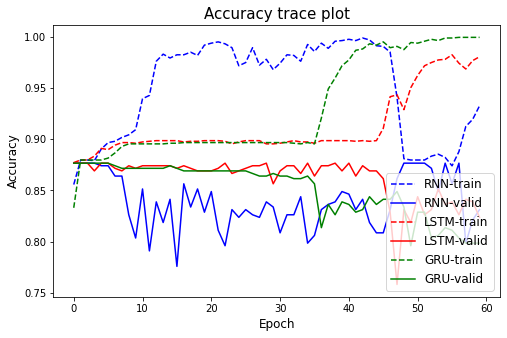

16/16 [==============================] - 0s 7ms/step - loss: 0.7957 - accuracy: 0.8629
Test data results
...RNN accuracy: 0.847, loss: 0.404
...LSTM accuracy: 0.877, loss: 0.451
...GRU accuracy: 0.863, loss: 0.796


In [91]:
plt.figure(figsize=(8,5))
plt.plot(rnn_history.history['accuracy'], 'b--', label='RNN-train')
plt.plot(rnn_history.history['val_accuracy'], 'b-', label='RNN-valid')
plt.plot(lstm_history.history['accuracy'], 'r--', label='LSTM-train')
plt.plot(lstm_history.history['val_accuracy'], 'r-', label='LSTM-valid')
plt.plot(gru_history.history['accuracy'], 'g--', label='GRU-train')
plt.plot(gru_history.history['val_accuracy'], 'g-', label='GRU-valid')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.title('Accuracy trace plot', fontsize=15)
plt.show()

rnn_results = rnn.evaluate(X_test, oh_y_test)
lstm_results = lstm.evaluate(X_test, oh_y_test)
gru_results = gru.evaluate(X_test, oh_y_test)
print('Test data results')
print('...RNN accuracy: %.3f, loss: %.3f'%(rnn_results[1], rnn_results[0]))
print('...LSTM accuracy: %.3f, loss: %.3f'%(lstm_results[1], lstm_results[0]))
print('...GRU accuracy: %.3f, loss: %.3f'%(gru_results[1], gru_results[0]))

### 모델 예측

In [92]:
y_pred_enc_rnn = rnn.predict(X_test)
y_pred_rnn = [np.argmax(i) for i in y_pred_enc_rnn]

y_pred_enc_lstm = lstm.predict(X_test)
y_pred_lstm = [np.argmax(i) for i in y_pred_enc_lstm]

y_pred_enc_gru = gru.predict(X_test)
y_pred_gru = [np.argmax(i) for i in y_pred_enc_gru]

16/16 [==============================] - 1s 7ms/step


In [93]:
unique_elements, counts_elements = np.unique(y_pred_rnn, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.vstack((unique_elements, counts_elements)))

unique_elements, counts_elements = np.unique(y_pred_lstm, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.vstack((unique_elements, counts_elements)))

unique_elements, counts_elements = np.unique(y_pred_gru, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.vstack((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[  0   1]
 [ 46 450]]
각 레이블에 대한 빈도수:
[[  0   1]
 [ 39 457]]
각 레이블에 대한 빈도수:
[[  0   1]
 [ 40 456]]


In [94]:
print('...RNN pr_auc: %.3f'%average_precision_score(y_test, y_pred_enc_rnn[:,1]))
print('...lstm pr_auc: %.3f'%average_precision_score(y_test, y_pred_enc_lstm[:,1]))
print('...gru pr_auc: %.3f'%average_precision_score(y_test, y_pred_enc_gru[:,1]))

...RNN pr_auc: 0.924
...lstm pr_auc: 0.949
...gru pr_auc: 0.953


In [95]:
def sentiment_predict(y_pred_enc ,new_sentence_index):
    print(X_test[new_sentence_index])
    print(' '.join([index_to_word[s] for s in X_test[new_sentence_index] if s!=0]))
    print(y_test[new_sentence_index])

    score = y_pred_enc

    if(np.argmax(score[new_sentence_index]) == 1):
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score[new_sentence_index][np.argmax(score[new_sentence_index])] * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.".format((score[new_sentence_index][np.argmax(score[new_sentence_index])]) * 100))

In [97]:
sentiment_predict(y_pred_enc_rnn, 4)
print('\n')
sentiment_predict(y_pred_enc_lstm, 4)
print('\n')
sentiment_predict(y_pred_enc_gru, 4)

[  55  724   90 1568   23   41    3  197    5  724    9   16  724   10
  746    6   55    3  238   16  136   55  240  342    3  197  176   23
   41    3   86    5    2  740    5 1407 1619    3  740    5  240   25
  193    4  102    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
no iron or board you have to use a iron room with iron for entire hotel no to help with taxi no coffee shop to use pool you have to get a and buy a swim cap to buy a coffee at restaurant is about
0
58.62% 확률로 긍정 리뷰입니다.


[  55  724   90 1568   23   41    3  197    5  724    9   16  724   10
  746    6   55    3  238   16  136   55  240  342    3  197  176   23
   41    3   86    5    2  740    5 1407 1619    3  740    5  240   25
  193    4  102    0    0    0    0    0    0    0    0  

In [98]:
sentiment_predict(y_pred_enc_rnn, 5)
print('\n')
sentiment_predict(y_pred_enc_lstm, 5)
print('\n')
sentiment_predict(y_pred_enc_gru, 5)

[   1   17    7   30   37 1250  282   29   25   71  191  246  275   71
  188    5  165  240  342   35   65   35   80  632    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
the location was great so happening down there at night got people make night market a lot coffee shop as well as food everywhere
1
91.99% 확률로 부정 리뷰입니다.


[   1   17    7   30   37 1250  282   29   25   71  191  246  275   71
  188    5  165  240  342   35   65   35   80  632    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

In [99]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred_rnn)
df1 = pd.DataFrame(matrix)
print(df)

matrix2 = confusion_matrix(y_test, y_pred_lstm)
df2 = pd.DataFrame(matrix2)
print(df2)

matrix3 = confusion_matrix(y_test, y_pred_gru)
df3 = pd.DataFrame(matrix3)
print(df3)

   0    1
0  2   40
1  4  450
    0    1
0  10   32
1  29  425
    0    1
0   7   35
1  33  421


In [100]:
y_test

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [101]:
print(classification_report(y_test, y_pred_rnn))

              precision    recall  f1-score   support

           0       0.13      0.14      0.14        42
           1       0.92      0.91      0.92       454

    accuracy                           0.85       496
   macro avg       0.53      0.53      0.53       496
weighted avg       0.85      0.85      0.85       496



In [102]:
print(classification_report(y_test, y_pred_lstm))

              precision    recall  f1-score   support

           0       0.26      0.24      0.25        42
           1       0.93      0.94      0.93       454

    accuracy                           0.88       496
   macro avg       0.59      0.59      0.59       496
weighted avg       0.87      0.88      0.87       496



In [103]:
print(classification_report(y_test, y_pred_gru))

              precision    recall  f1-score   support

           0       0.17      0.17      0.17        42
           1       0.92      0.93      0.93       454

    accuracy                           0.86       496
   macro avg       0.55      0.55      0.55       496
weighted avg       0.86      0.86      0.86       496



## [1-6] /bert : TFBertClassifier

In [251]:
df = pd.read_csv('df_20.csv')
df['label'] = df['score'].apply(lambda x: 1 if x >= 7.0 else 0)  #긍정:1, 부정:0

In [252]:
df["document"] = df['review']
df = df.drop(['review'], axis = 1)

In [253]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=1004)

In [195]:
# ! pip install transformers

In [254]:
import os
import re
import numpy as np
from tqdm import tqdm

import tensorflow as tf
from transformers import *

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import pandas as pd
import matplotlib.pyplot as plt

In [255]:
# 시각화

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [198]:

#random seed 고정
tf.random.set_seed(1234)
np.random.seed(1234)

BATCH_SIZE = 32
NUM_EPOCHS = 5
VALID_SPLIT = 0.2
MAX_LEN = 100 # EDA에서 추출된 Max Length


In [199]:
import os
os.chdir('/content/drive/Shareddrives/UROP')   #파일이 있는 폴더의 경로를 가져오기
os.getcwd()

os.listdir('bert')

['multi_cased_L-12_H-768_A-12',
 '__MACOSX',
 'bert_model.ckpt.meta',
 'bert_model.ckpt.data-00000-of-00001',
 'vocab.txt',
 'bert_config.json',
 'bert_model.ckpt.index']

In [200]:
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased", cache_dir='bert_ckpt', do_lower_case=False)

loading file vocab.txt from cache at bert_ckpt/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at bert_ckpt/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/tokenizer_config.json
loading configuration file config.json from cache at bert_ckpt/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,


In [201]:
kor_encode = tokenizer.encode("안녕하세요, 반갑습니다")
eng_encode = tokenizer.encode("Hello world")
kor_decode = tokenizer.decode(kor_encode)
eng_decode = tokenizer.decode(eng_encode)

print(kor_encode)
# [101, 9521, 118741, 35506, 24982, 48549, 117, 9321, 118610, 119081, 48345, 102]
print(eng_encode)
# [101, 31178, 11356, 102]
print(kor_decode)
# [CLS] 안녕하세요, 반갑습니다 [SEP]
print(eng_decode)
# [CLS] Hello world [SEP]

[101, 9521, 118741, 35506, 24982, 48549, 117, 9321, 118610, 119081, 48345, 102]
[101, 31178, 11356, 102]
[CLS] 안녕하세요, 반갑습니다 [SEP]
[CLS] Hello world [SEP]


In [202]:
train_data = train
train_data.head()

,score,name,region,len,label,document
1852,10.0,Sunset Hotel,busan,47,1,nice staff good room condition perfect location
1332,10.0,Ramada Encore by Wyndham Busan Station,busan,47,1,very near to train stationbus stop easy to move
349,8.0,Nine Tree Premier Hotel Insadong,seoul,190,1,you can walk to most attractions from the hotel the hotel also has a locker system to store bags which is very safe attached to a small mall and has abundant of food choices along the street
1538,8.4,Best Western Haeundae Hotel,busan,106,1,best location in busan u can get everything here food shopping leisure also closed to bus stop via airport
2382,6.4,Shinshin Hotel Jeju Airport,jeju,25,0,good stay and comfortable


In [203]:
# 스페셜 토큰
print(tokenizer.all_special_tokens, "\n", tokenizer.all_special_ids)

# 토크나이저 테스트하기
kor_encode = tokenizer.encode("안녕하세요, 반갑습니다. ")
eng_encode = tokenizer.encode("Hello world")

kor_decode = tokenizer.decode(kor_encode)
eng_decode = tokenizer.decode(eng_encode)

print(kor_encode)
print(eng_encode)
print(kor_decode)
print(eng_decode)

['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]'] 
 [100, 102, 0, 101, 103]
[101, 9521, 118741, 35506, 24982, 48549, 117, 9321, 118610, 119081, 48345, 119, 102]
[101, 31178, 11356, 102]
[CLS] 안녕하세요, 반갑습니다. [SEP]
[CLS] Hello world [SEP]


In [204]:
# Bert Tokenizer

# 참조: https://huggingface.co/transformers/main_classes/tokenizer.html?highlight=encode_plus#transformers.PreTrainedTokenizer.encode_plus

def bert_tokenizer(sent, MAX_LEN):
    
    encoded_dict = tokenizer.encode_plus(
        text = sent,
        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
        max_length = MAX_LEN,           # Pad & truncate all sentences.
        pad_to_max_length = True,
        return_attention_mask = True   # Construct attn. masks.
        
    )
    
    input_id = encoded_dict['input_ids']
    attention_mask = encoded_dict['attention_mask'] # And its attention mask (simply differentiates padding from non-padding).
    token_type_id = encoded_dict['token_type_ids'] # differentiate two sentences
    
    return input_id, attention_mask, token_type_id

In [205]:
# train_data = train_data[:1000] # for test

input_ids = []
attention_masks = []
token_type_ids = []
train_data_labels = []

for train_sent, train_label in tqdm(zip(train_data["document"], train_data["label"]), total=len(train_data)):
    try:
        input_id, attention_mask, token_type_id = bert_tokenizer(train_sent, MAX_LEN)
        
        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
        train_data_labels.append(train_label)

    except Exception as e:
        print(e)
        print(train_sent)
        pass

train_movie_input_ids = np.array(input_ids, dtype=int)
train_movie_attention_masks = np.array(attention_masks, dtype=int)
train_movie_type_ids = np.array(token_type_ids, dtype=int)
train_movie_inputs = (train_movie_input_ids, train_movie_attention_masks, train_movie_type_ids)

train_data_labels = np.asarray(train_data_labels, dtype=np.int32) #레이블 토크나이징 리스트

print("# sents: {}, # labels: {}".format(len(train_movie_input_ids), len(train_data_labels)))

  0%|          | 0/1984 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 1984/1984 [00:01<00:00, 1119.18it/s]


# sents: 1984, # labels: 1984


In [206]:
# 최대 길이: 100
input_id = train_movie_input_ids[1]
attention_mask = train_movie_attention_masks[1]
token_type_id = train_movie_type_ids[1]

print(input_id)
print(attention_mask)
print(token_type_id)
print(tokenizer.decode(input_id))

[  101 12558 12883 10114 17767 11825 13763 20517 44346 10114 18577   102
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [207]:
class TFBertClassifier(tf.keras.Model):
    def __init__(self, model_name, dir_path, num_class):
        super(TFBertClassifier, self).__init__()

        self.bert = TFBertModel.from_pretrained(model_name, cache_dir=dir_path)
        self.dropout = tf.keras.layers.Dropout(self.bert.config.hidden_dropout_prob)
        self.classifier = tf.keras.layers.Dense(num_class, 
                                                kernel_initializer=tf.keras.initializers.TruncatedNormal(self.bert.config.initializer_range), 
                                                name="classifier")
        
    def call(self, inputs, attention_mask=None, token_type_ids=None, training=False):
        
        #outputs 값: # sequence_output, pooled_output, (hidden_states), (attentions)
        outputs = self.bert(inputs, attention_mask=attention_mask, token_type_ids=token_type_ids)
        pooled_output = outputs[1] 
        pooled_output = self.dropout(pooled_output, training=training)
        logits = self.classifier(pooled_output)

        return logits

cls_model = TFBertClassifier(model_name='bert-base-multilingual-cased',
                                  dir_path='bert_ckpt',
                                  num_class=2)

loading configuration file config.json from cache at bert_ckpt/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 119547
}

loading weights file tf_model.h5 from cache at bert_ckpt/mo

In [208]:
# 학습 준비하기
optimizer = tf.keras.optimizers.Adam(3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
cls_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [209]:
DATA_OUT_PATH = "/content/drive/Shareddrives/UROP/bert_ckpt"

In [210]:
model_name = "tf2_bert_hotel_review"

# overfitting을 막기 위한 ealrystop 추가
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=2)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)\

checkpoint_path = os.path.join(DATA_OUT_PATH, model_name, 'weights.h5')
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    
cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

# 학습과 eval 시작
history = cls_model.fit(train_movie_inputs, train_data_labels, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,
                    validation_split = VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

#steps_for_epoch

print(history.history)

/content/drive/Shareddrives/UROP/bert_ckpt/tf2_bert_hotel_review -- Folder already exists 

Epoch 1/5
50/50 [==============================] - ETA: 0s - loss: 0.3273 - accuracy: 0.8878
Epoch 1: val_accuracy improved from -inf to 0.89924, saving model to /content/drive/Shareddrives/UROP/bert_ckpt/tf2_bert_hotel_review/weights.h5
50/50 [==============================] - 60s 872ms/step - loss: 0.3273 - accuracy: 0.8878 - val_loss: 0.2550 - val_accuracy: 0.8992
Epoch 2/5
50/50 [==============================] - ETA: 0s - loss: 0.2405 - accuracy: 0.9061
Epoch 2: val_accuracy did not improve from 0.89924
50/50 [==============================] - 34s 677ms/step - loss: 0.2405 - accuracy: 0.9061 - val_loss: 0.2688 - val_accuracy: 0.8816
Epoch 3/5
50/50 [==============================] - ETA: 0s - loss: 0.1673 - accuracy: 0.9433
Epoch 3: val_accuracy improved from 0.89924 to 0.90428, saving model to /content/drive/Shareddrives/UROP/bert_ckpt/tf2_bert_hotel_review/weights.h5
50/50 [==============

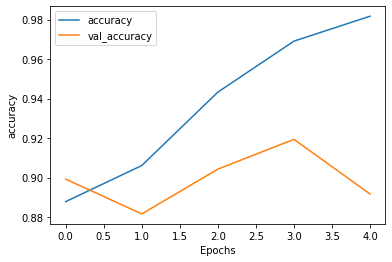

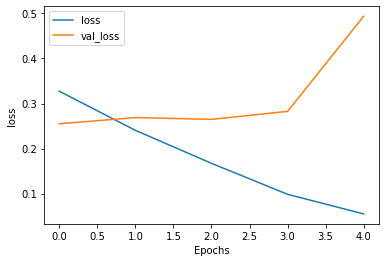

In [211]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [235]:
test_data = test

input_ids = []
attention_masks = []
token_type_ids = []
test_data_labels = []

for test_sent, test_label in tqdm(zip(test_data["document"], test_data["label"])):
    try:
        input_id, attention_mask, token_type_id = bert_tokenizer(test_sent, MAX_LEN)

        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
        test_data_labels.append(test_label)
    except Exception as e:
        print(e)
        print(test_sent)
        pass

test_movie_input_ids = np.array(input_ids, dtype=int)
test_movie_attention_masks = np.array(attention_masks, dtype=int)
test_movie_type_ids = np.array(token_type_ids, dtype=int)
test_movie_inputs = (test_movie_input_ids, test_movie_attention_masks, test_movie_type_ids)

test_data_labels = np.asarray(test_data_labels, dtype=np.int32) #레이블 토크나이징 리스트

print("num sents, labels {}, {}".format(len(test_movie_input_ids), len(test_data_labels)))

0it [00:00, ?it/s]/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
496it [00:00, 1250.74it/s]


num sents, labels 496, 496


### 모델 예측

In [236]:
results = cls_model.evaluate(test_movie_inputs, test_data_labels, batch_size=1024)
print('...BERT accuracy: %.3f, loss: %.3f'%(results [1], results [0]))

1/1 [==============================] - 3s 3s/step - loss: 0.5064 - accuracy: 0.9012
...BERT accuracy: 0.901, loss: 0.506


In [238]:
unique_elements, counts_elements = np.unique(y_pred_bert, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.vstack((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[  0   1]
 [ 38 458]]


In [239]:
y_pred_enc_bert = cls_model.predict(test_movie_inputs)
y_pred_bert = [np.argmax(i) for i in y_pred_enc_bert]

16/16 [==============================] - 3s 206ms/step


In [240]:
#예측
y_pred_enc_bert[:5]

array([[-4.8205357,  4.077102 ],
       [-4.7991686,  4.1840463],
       [-4.7833943,  4.168074 ],
       [-4.7886705,  4.1320825],
       [-4.7456594,  4.186603 ]], dtype=float32)

In [241]:
y_pred_bert[:5]

[1, 1, 1, 1, 1]

In [243]:
y_true = test['label']

In [258]:
y_true[:5]

562    1
49     1
668    1
623    1
41     1
Name: label, dtype: int64

In [244]:
from sklearn.metrics import confusion_matrix, classification_report

matrix = confusion_matrix(y_true, y_pred_bert)
df5 = pd.DataFrame(matrix)
print(df5, '\n')

    0    1
0  19   30
1  19  428 



In [257]:
print('...bert pr_auc: %.3f'% average_precision_score(y_true, y_pred_enc_bert[:,1]))

...bert pr_auc: 0.987


In [246]:
print(classification_report(y_true, y_pred_bert))

              precision    recall  f1-score   support

           0       0.50      0.39      0.44        49
           1       0.93      0.96      0.95       447

    accuracy                           0.90       496
   macro avg       0.72      0.67      0.69       496
weighted avg       0.89      0.90      0.90       496



# ==============================================================

# [2회귀] 지도학습 기반 평점분석 (0~10) 점수 예측 
- 릿지 회귀 모델 (점수 자체를 예측)

In [163]:
data = df

In [164]:
X = padded
y = np.array(data['score'])

print(X.shape)
print(y.shape)

(2480, 100)
(2480,)


In [165]:
print(X[0])
print(y[0])

[  38    2   11   36  120   25    1    2  118   12   22    6    1  840
   26  792  621  547 1448  334    2  189    9   14    4  357   87    8
  335   75    3  138    1  748   10   48   28    7    3  886   39    1
  566   25   31   14    7  349  135    5  196   53   27    1    6   11
  841    3   28   72   73  887    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
10.0


In [166]:
y

array([10. ,  9.6,  8. , ...,  4.8,  4.8,  9.6])

## [2-1] LSTM

### train_test_split & EDA

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=2023)

print("훈련데이터 X와 y의 차원:", X_train.shape, y_train.shape)
print("시험데이터 X와 y의 차원:", X_test.shape, y_test.shape)

훈련데이터 X와 y의 차원: (1984, 100) (1984,)
시험데이터 X와 y의 차원: (496, 100) (496,)


In [168]:
## 데이터 들여다보기
print('Number of train samples: %d'%len(X_train))
print('Number of test samples: %d'%len(X_test))
print('An example of the reuters data set')
print('...Input sample')
print(X_train[0])
print(len(X_train[0]))
print('...Output samples (2)')
print(y_train[0:10])
print('Number of categories: %d'%(y_test.max()+1))

Number of train samples: 1984
Number of test samples: 496
An example of the reuters data set
...Input sample
[  22    4   38  344   68  171   25   22    6   38  198  232    4   30
   18   22   68    4   24   35   15  152  402    4  660  135   38  198
  215   65  558    1   12    1    9    4  353   18    1  642    8   48
    9    4   24   82   14  156   46  108  255  226   18  271  226    1
   58  124    1 1717  756   10    1  226  656  595   24  756    1  542
   25   52   17 1343    4  146   15  102  196   53    3  143   99  107
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
100
...Output samples (2)
[ 9.2 10.   8.4 10.   9.6  9.2 10.  10.  10.  10. ]
Number of categories: 11


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


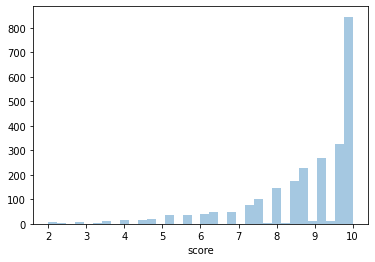

In [169]:
# 각 점수에 대한 빈도수
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train = data['score']
plt.figure(figsize=(6,4))
sns.distplot(y_train, kde=False)

### 모델

In [170]:
def rmsle(y , y_pred):
    # underflow, overflow를 막기 위해 log가 아닌 log1p로 rmsle 계산 
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_org_price(y_test , preds): 
    
    # 원본 데이터는 log1p로 변환되었으므로 exmpm1으로 원복 필요. 
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)
    
    # rmsle로 RMSLE 값 추출
    rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
    return rmsle_result

In [171]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [172]:
from tensorflow.keras.layers import Dense, LSTM, Embedding, SimpleRNN, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import tensorflow as tf

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='relu'))


model.compile(optimizer='adam', loss='mae', metrics=['mae', 'mse'])

history = model.fit(X_train, y_train, epochs=60, batch_size=64, validation_split=0.2)

Epoch 1/60
25/25 [==============================] - 2s 31ms/step - loss: 4.4711 - mae: 4.4711 - mse: 32.8171 - val_loss: 1.1004 - val_mae: 1.1004 - val_mse: 2.7690
Epoch 2/60
25/25 [==============================] - 0s 12ms/step - loss: 0.9891 - mae: 0.9891 - mse: 2.3363 - val_loss: 1.0510 - val_mae: 1.0510 - val_mse: 2.4848
Epoch 3/60
25/25 [==============================] - 0s 12ms/step - loss: 0.9537 - mae: 0.9537 - mse: 2.2636 - val_loss: 0.9972 - val_mae: 0.9972 - val_mse: 2.2019
Epoch 4/60
25/25 [==============================] - 0s 11ms/step - loss: 0.9388 - mae: 0.9388 - mse: 2.3436 - val_loss: 0.9963 - val_mae: 0.9963 - val_mse: 2.1887
Epoch 5/60
25/25 [==============================] - 0s 11ms/step - loss: 0.9401 - mae: 0.9401 - mse: 2.2899 - val_loss: 0.9988 - val_mae: 0.9988 - val_mse: 2.2202
Epoch 6/60
25/25 [==============================] - 0s 11ms/step - loss: 0.9338 - mae: 0.9338 - mse: 2.3449 - val_loss: 0.9939 - val_mae: 0.9939 - val_mse: 2.1561
Epoch 7/60
25/25 [===

### 학습 데이터, 평가 데이터, 시험 데이터에서의 분류 정확도 확인하기

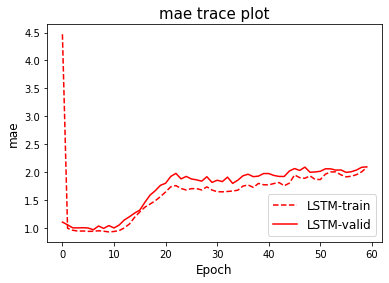

16/16 [==============================] - 1s 10ms/step - loss: 2.0353 - mae: 2.0749 - mse: 12.8617
Test data results
...LSTM mae : mae: 2.075, loss: 2.035


In [173]:
plt.plot(history.history['mae'], 'r--', label='LSTM-train')
plt.plot(history.history['val_mae'], 'r-', label='LSTM-valid')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('mae', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.title('mae trace plot', fontsize=15)
plt.show()

lstm_results = model.evaluate(X_test, y_test)
print('Test data results')
print('...LSTM mae : mae: %.3f, loss: %.3f'%(lstm_results[1], lstm_results[0]))

### 모델 예측

In [174]:
y_predict = model.predict(X_test)

print('예측값:', y_predict[15])
print('실제값:' , y_test[15])

16/16 [==============================] - 1s 5ms/step
예측값: [9.671825]
실제값: 10.0


In [175]:
# # R2 구하기
# from sklearn.metrics import r2_score
# r2_y_predict = r2_score(y_test, y_predict)
# print("R2 : ", r2_y_predict)

loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)
print("테스트 세트의 평균 절대 오차: {:5.2f}".format(mae))

print("lstm은 {:.4f}의 rmsle 값".format(evaluate_org_price(y_test ,y_predict)))

16/16 - 0s - loss: 2.0353 - mae: 2.0749 - mse: 12.8617 - 185ms/epoch - 12ms/step
테스트 세트의 평균 절대 오차:  2.07
lstm은 3.5468의 rmsle 값


(1.6, 13.435324668884276, -0.5379693031311036, 11.297355365753173)

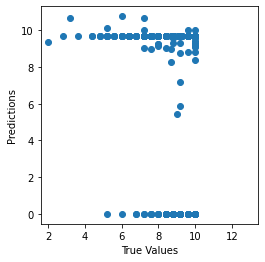

In [176]:
# 예측 

# plt.xlim([0, 10])  
# plt.ylim([0, 10])

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('square')

## [2-0] 피처 인코딩과 피처 벡터화

In [177]:
# 피처 인코딩과 피처 벡터화
df = data

print('brand name 의 유형 건수 :', df['name'].nunique())
print('brand name sample 39건 : \n', df['name'].value_counts()[:39])

brand name 의 유형 건수 : 39
brand name sample 39건 : 
 ASTI Hotel Busan Station                          98
Stanford Hotel Myeongdong                         97
Sunset Hotel                                      95
LOTTE City Hotel Jeju                             94
Shilla Stay Haeundae                              91
Ramada Encore by Wyndham Busan Station            88
Toyoko Inn Busan Station 1                        87
Best Western Haeundae Hotel                       85
Golden Tulip Incheon Airport Hotel                80
I Jin Hotel                                       79
Days Hotel & Suites by Wyndham Incheon Airport    79
Best Western Premier Incheon Airport              79
Hotel PJ Myeongdong                               78
Hotel Skypark Central Myeongdong                  78
Ramada Encore by Wyndham Busan Haeundae           77
Imperial Palace Boutique Hotel                    76
Nine Tree Premier Hotel Insadong                  76
Shinshin Hotel Jeju Airport                      

In [178]:
print('호텔 지역 갯수 :', df['region'].nunique())
print('호텔 지역 갯수 : \n', df['region'].value_counts()[:4])

호텔 지역 갯수 : 4
호텔 지역 갯수 : 
 seoul      764
busan      745
jeju       564
incheon    407
Name: region, dtype: int64


In [179]:
df['review'] = df['document']

In [180]:
pd.set_option('max_colwidth', 200)

# item_description의 평균 문자열 개수
print('review 평균 문자열 개수:',df['review'].str.len().mean())

df['review'][:2]

review 평균 문자열 개수: 236.56693548387096


0    my colleague and i were blown away at the aesthetic ambience and overall beauty of this hotel the bathrooms are japanese style including deep tub and shower room it is conveniently located in mapo...
1    lovely hotel in a busy neighborhood big super markets subway station with  intersecting lines including airport line and diverse selection of restaurants in walking distance it was very clean and ...
Name: review, dtype: object

In [181]:
# review 에 대한 feature vectorization 변환 
tfidf_descp = TfidfVectorizer(max_features = 7000, ngram_range= (1,3) , stop_words='english')
X_descp = tfidf_descp.fit_transform(df['review'])

print('review vectorization shape:',X_descp.shape)

review vectorization shape: (2480, 7000)


In [182]:
from sklearn.preprocessing import LabelBinarizer


# brand_name,  각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_brand_name= LabelBinarizer(sparse_output=True)
X_brand = lb_brand_name.fit_transform(df['name'])

#
lb_brand_st= LabelBinarizer(sparse_output=True)
X_label = lb_brand_st.fit_transform(df['label'])


In [183]:
print(type(X_brand))
print('X_brand_shape:{0}'.format(X_brand.shape))

<class 'scipy.sparse.csr.csr_matrix'>
X_brand_shape:(2480, 39)


In [184]:
from  scipy.sparse import hstack
import gc

sparse_matrix_list = (X_descp, X_brand, X_label)

# 사이파이 sparse 모듈의 hstack 함수를 이용하여 앞에서 인코딩과 Vectorization을 수행한 데이터 셋을 모두 결합. 
X_features_sparse= hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

# 데이터 셋이 메모리를 많이 차지하므로 사용 용도가 끝났으면 바로 메모리에서 삭제. 
del X_features_sparse
gc.collect()

<class 'scipy.sparse.csr.csr_matrix'> (2480, 7040)


7125

## [2-1] 릿지 회귀 모델 구축 및 평가

In [185]:
import gc 
from  scipy.sparse import hstack

def model_train_predict(model,matrix_list):
    # scipy.sparse 모듈의 hstack 을 이용하여 sparse matrix 결합
    X= hstack(matrix_list).tocsr()     
    
    X_train, X_test, y_train, y_test=train_test_split(X, df['score'], 
                                                      test_size=0.2, random_state = 2023)
    
    # 모델 학습 및 예측
    model.fit(X_train , y_train)
    preds = model.predict(X_test)
    
    del X , X_train , X_test , y_train 
    gc.collect()
    
    return preds , y_test

In [186]:
from sklearn.linear_model import Ridge , LogisticRegression
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
import pandas as pd
import numpy as np

In [187]:
linear_model = Ridge(solver = "lsqr", fit_intercept=False)

sparse_matrix_list = (X_descp, X_label, X_brand)
linear_preds , y_test = model_train_predict(model=linear_model , matrix_list=sparse_matrix_list)
print('review을 포함한 rmsle 값:',  evaluate_org_price(y_test ,linear_preds))

review을 포함한 rmsle 값: 0.9287387042931144


In [188]:
linear_preds , _ = model_train_predict(model=linear_model , matrix_list=sparse_matrix_list)

##[2-2] LightGBM 회귀 모델 구축

In [189]:
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_brand)

lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.01, num_leaves=125, random_state=2023)
lgbm_preds , y_test = model_train_predict(model = lgbm_model , matrix_list=sparse_matrix_list)
print('LightGBM rmsle 값:',  evaluate_org_price(y_test , lgbm_preds))

LightGBM rmsle 값: 1.2005147126449007


## [2-3] 앙상블을 이용한 최종 예측 평가

In [190]:
preds = lgbm_preds * 0.45 + linear_preds * 0.55
print('LightGBM과 Ridge를 ensemble한 최종 rmsle 값:',  evaluate_org_price(y_test , preds))

LightGBM과 Ridge를 ensemble한 최종 rmsle 값: 0.8298434714145844
